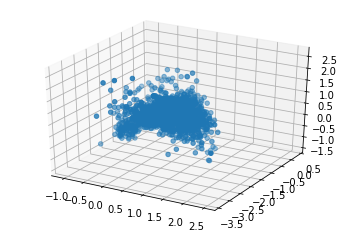

(3744, 6)


,timestamp,UTC time,accuracy,x,y,z
20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046
20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554
20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467
20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

df = pd.read_csv("train_time_series.csv", index_col=0)
x = df["x"]
y = df["y"]
z = df["z"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
plt.show()
print(df.shape)
df.head()

In [7]:
X_train = pd.read_csv("train_time_series.csv", index_col=0)
X_test = pd.read_csv("test_time_series.csv", index_col=0)
y_train = pd.read_csv("train_labels.csv", index_col=0)
y_test = pd.read_csv("test_labels.csv", index_col=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

df_train = X_train.merge(y_train, how = "left", left_on = "timestamp", right_on = "timestamp") # merge X_train with y_train
df_test = X_test.merge(y_test, how = "left", left_on = "timestamp", right_on = "timestamp") # and vice versa

print(df_train.head())
print(df_test.head())

(3744, 6) (375, 3) (1250, 6) (125, 3)
       timestamp               UTC time_x accuracy         x         y  \
0  1565109930787  2019-08-06T16:45:30.787  unknown -0.006485 -0.934860   
1  1565109930887  2019-08-06T16:45:30.887  unknown -0.066467 -1.015442   
2  1565109930987  2019-08-06T16:45:30.987  unknown -0.043488 -1.021255   
3  1565109931087  2019-08-06T16:45:31.087  unknown -0.053802 -0.987701   
4  1565109931188  2019-08-06T16:45:31.188  unknown -0.054031 -1.003616   

          z               UTC time_y  label  
0 -0.069046                      NaN    NaN  
1  0.089554                      NaN    NaN  
2  0.178467                      NaN    NaN  
3  0.068985  2019-08-06T16:45:31.087    1.0  
4  0.126450                      NaN    NaN  
       timestamp               UTC time_x accuracy         x         y  \
0  1565110306139  2019-08-06T16:51:46.139  unknown  0.034286 -1.504456   
1  1565110306239  2019-08-06T16:51:46.239  unknown  0.409164 -1.038544   
2  1565110306340  2

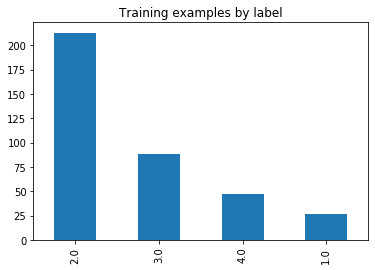

In [8]:
df_train['label'].value_counts().plot(kind='bar', title='Training examples by label');

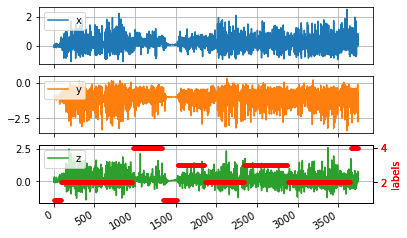

In [9]:
def plot_activity(df):
    data = df[['x', 'y', 'z']]
    axis = data.plot(subplots=True, grid = True)
    for ax1 in axis:
        ax1.legend(loc='upper left')
        
    for ax2 in axis:
        ax2 = ax1.twinx()
        ax2.set_ylabel("labels", color = "red")
        ax2.plot(df["label"], color = "red", marker = ".")
        ax2.tick_params(axis = "y", labelcolor = "red")
    
plot_activity( df_train) 

In [103]:
df_train = df_train.dropna(how = "any")
df_train.reset_index(drop = True, inplace = True)

df_test = df_test.reindex
print("df_train: \n%s" % df_train, "\n")
print("df_test: \n%s" % df_test)

AttributeError: 'list' object has no attribute 'dropna'

In [86]:
from sklearn.model_selection import train_test_split
df_train = df_train[1:]
train , test = train_test_split(df_train, test_size = 0.5)

x_train = train[["x","y","z"]]
y_train = train['label']

x_test = train[["x","y","z"]]
y_test = test['label']


In [87]:
#  Preprocessing – Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [88]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [89]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.0904995136125413
RMSE value for k=  2 is: 1.035844087193132
RMSE value for k=  3 is: 1.0154955594345212
RMSE value for k=  4 is: 0.9932202608115113
RMSE value for k=  5 is: 0.9684760946693242
RMSE value for k=  6 is: 0.950422697173896
RMSE value for k=  7 is: 0.9312257874336746
RMSE value for k=  8 is: 0.9231903408319464
RMSE value for k=  9 is: 0.9111697044075985
RMSE value for k=  10 is: 0.9035066819478007
RMSE value for k=  11 is: 0.8933527135495497
RMSE value for k=  12 is: 0.8929991307092339
RMSE value for k=  13 is: 0.8885972032394597
RMSE value for k=  14 is: 0.8915086341632619
RMSE value for k=  15 is: 0.8874703395627392
RMSE value for k=  16 is: 0.8841103904108539
RMSE value for k=  17 is: 0.8804430840860598
RMSE value for k=  18 is: 0.8790939309725702
RMSE value for k=  19 is: 0.8781407871437071
RMSE value for k=  20 is: 0.8765179882830607


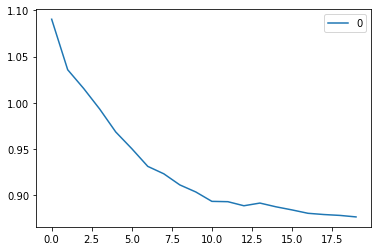

In [90]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [105]:
df_test = df_test[["x","y","z"]]

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=31)

knn.fit(df_train[["x","y","z"]],df_train['label'])

pred = knn.predict(df_test)

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(df_test['label'],pred))

print(classification_report(df_test['label'],pred))


TypeError: 'DataFrame' object is not callable